<a href="https://colab.research.google.com/github/ChanceDurr/MyUberEats/blob/master/myubereats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ChanceDurr/MyUberEats/master/uber_hist.csv')

# Replace all of the NaN's with 0's
df = df.fillna(0)

# Add a column for the total without the tip
df['total_no_tip'] = df['total'] - df['tips']

# Delete rows with no information
df = df.drop(range(49, 62))

# Chance the timestamp to datetime format
df['timestamp_pickup'] = pd.to_datetime(df['timestamp_pickup'])

In [306]:
num_deliveries = df.shape[0] - 1
print(f'Number of deliveries: {num_deliveries}')

earliest_delivery = df['timestamp_pickup'].min()
print(f'Earliest Delivery: {earliest_delivery}')

latest_delivery = df['timestamp_pickup'].max()
print(f'Latest Delivery: {latest_delivery}')

mean_duration = df['duration_min'].mean()
print(f'Mean Duration(min): {mean_duration}')
 
mean_total_no_tip = df['total_no_tip'].mean()
print(f'Mean Total no Tip: {mean_total_no_tip}')

Number of deliveries: 48
Earliest Delivery: 2019-05-18 16:53:00
Latest Delivery: 2019-06-13 20:35:00
Mean Duration(min): 20.21805102040816
Mean Total no Tip: 8.224897959183673


In [0]:
# Create a subset for deliveries less than 20 minutes
df_shorttrips = df[df['duration_min'] < 20]

# Create a subset for deliveries more than 20 minutes
df_longtrips = df[df['duration_min'] >= 20]

In [308]:
# Get some basic stats on the short trip subset
short_trip_max_total = df_shorttrips['total_no_tip'].max()
short_trip_min_total = df_shorttrips['total_no_tip'].min()
short_trip_mean = df_shorttrips['total_no_tip'].mean()

print(f'''Short trip max total: {short_trip_max_total}
Short trip min total: {short_trip_min_total}
Short trip mean: {short_trip_mean}''')

Short trip max total: 10.0
Short trip min total: 3.49
Short trip mean: 5.721666666666668


In [309]:
# Get some basic stats on the long trip subset
long_trip_max_total = df_longtrips['total_no_tip'].max()
long_trip_min_total = df_longtrips['total_no_tip'].min()
long_trip_mean = df_longtrips['total_no_tip'].mean()

print(f'''Long trip max total: {long_trip_max_total}
Long trip min total: {long_trip_min_total}
Long trip mean: {long_trip_mean}''')

Long trip max total: 16.8
Long trip min total: 5.45
Long trip mean: 10.627999999999997


In [310]:
df.head()

,timestamp_pickup,day_of_week,start_city,end_city,double_delivery,duration_min,distance_miles,paid_distance,paid_time,min_fare_supplement,pickup_fee,dropoff_fee,tips,surge,boost,uber_receives,total,total_no_tip
0,2019-05-18 16:53:00,Saturday,Auburn,Auburn,0.0,21.3000,5.22,2.19,3.43,0.0,1.05,0.7,0.0,0.0,0.0,3.16,7.37,7.37
1,2019-05-18 17:23:00,Saturday,Auburn,Auburn,0.0,15.5500,3.84,1.61,2.51,0.0,1.05,0.7,0.0,0.0,0.0,2.51,5.87,5.87
2,2019-05-18 17:56:00,Saturday,Auburn,Auburn,0.0,15.1167,3.35,1.41,2.43,0.0,1.05,0.7,0.0,0.0,0.0,2.40,5.59,5.59
3,2019-05-19 17:08:00,Sunday,Federal Way,Auburn,0.0,15.8000,3.23,1.36,2.54,0.0,1.05,0.7,0.0,0.0,0.0,2.42,5.65,5.65
4,2019-05-19 17:26:00,Sunday,Federal Way,Auburn,0.0,25.4167,14.06,5.91,4.74,0.0,1.05,0.7,0.0,0.0,0.0,5.31,12.40,12.40


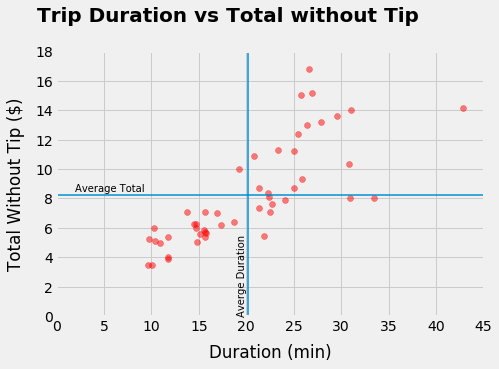

In [312]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(221)
plt.style.use('fivethirtyeight')
ax.scatter(df['duration_min'], df['total_no_tip'], alpha=.5, color='r')
ax.set_ylabel('Total Without Tip ($)', labelpad=10)
ax.set_xlabel('Duration (min)', labelpad=10)
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40 ,45])
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16 , 18])
ax.text(s='Trip Duration vs Total without Tip', x=-2, y=20, fontsize=20, fontweight='bold', fontname='Comic Sans')
ax.text(19, 5, s='Averge Duration', rotation='vertical', fontsize=10)
ax.text(2, 8.5, s='Average Total', fontsize=10)
ax.axvline(mean_duration, linewidth=1.5)
ax.axhline(mean_total_no_tip, linewidth=1.5)
plt.show()

ValueError: ignored

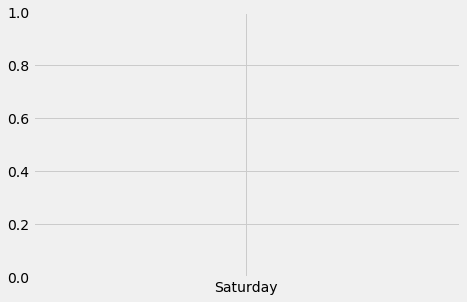

In [324]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(221)
plt.style.use('fivethirtyeight')
ax.scatter(df['day_of_week'], df['tips'], alpha=.5, color='r')
ax.set_ylabel('Total Without Tip ($)', labelpad=10)
ax.set_xlabel('Duration (min)', labelpad=10)
ax.set_yticks([1, 2, 4, 6, 8, 10, 12, 14, 16 , 18])
ax.text(s='Trip Duration vs Total without Tip', x=-2, y=20, fontsize=20, fontweight='bold', fontname='Comic Sans')

plt.show()

In [319]:
df.head()

,timestamp_pickup,day_of_week,start_city,end_city,double_delivery,duration_min,distance_miles,paid_distance,paid_time,min_fare_supplement,pickup_fee,dropoff_fee,tips,surge,boost,uber_receives,total,total_no_tip
0,2019-05-18 16:53:00,Saturday,Auburn,Auburn,0.0,21.3000,5.22,2.19,3.43,0.0,1.05,0.7,0.0,0.0,0.0,3.16,7.37,7.37
1,2019-05-18 17:23:00,Saturday,Auburn,Auburn,0.0,15.5500,3.84,1.61,2.51,0.0,1.05,0.7,0.0,0.0,0.0,2.51,5.87,5.87
2,2019-05-18 17:56:00,Saturday,Auburn,Auburn,0.0,15.1167,3.35,1.41,2.43,0.0,1.05,0.7,0.0,0.0,0.0,2.40,5.59,5.59
3,2019-05-19 17:08:00,Sunday,Federal Way,Auburn,0.0,15.8000,3.23,1.36,2.54,0.0,1.05,0.7,0.0,0.0,0.0,2.42,5.65,5.65
4,2019-05-19 17:26:00,Sunday,Federal Way,Auburn,0.0,25.4167,14.06,5.91,4.74,0.0,1.05,0.7,0.0,0.0,0.0,5.31,12.40,12.40
